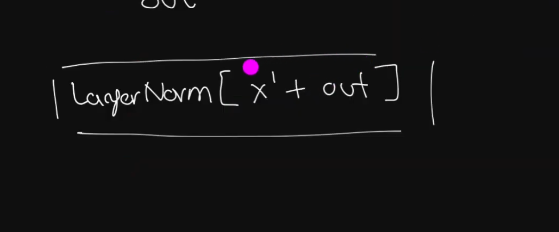

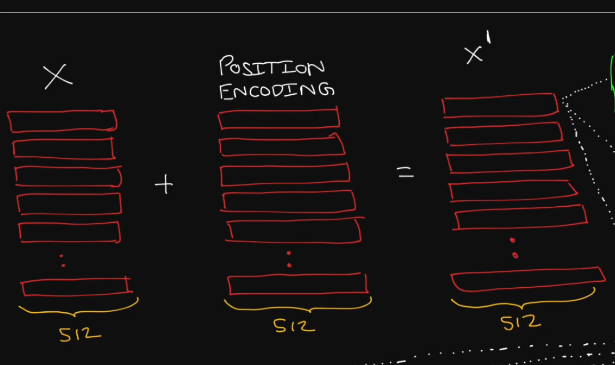

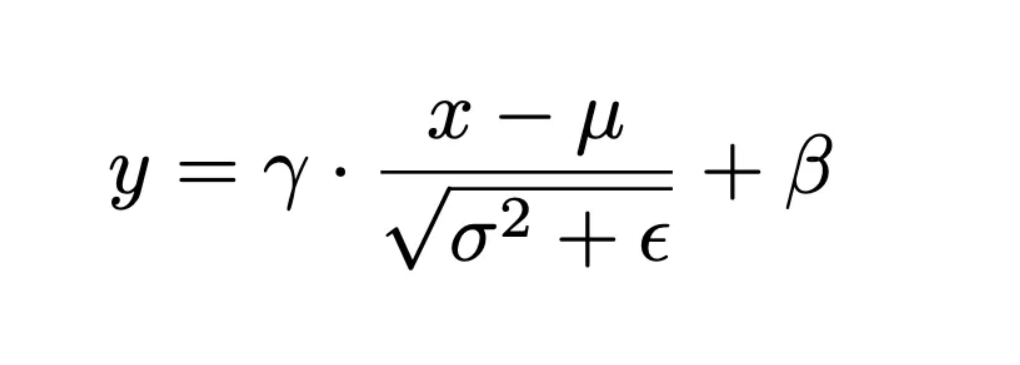

In [ ]:
# layer normalization centre of 0 and standard deviation of one


In [1]:
import torch
import torch.nn as nn

class AddNormLayer(nn.Module):
    def __init__(self, sublayer: nn.Module, size: int, eps: float = 1e-6):
        super(AddNormLayer, self).__init__()
        self.sublayer = sublayer
        self.norm = nn.LayerNorm(size, eps=eps)

    def forward(self, x):
        return self.norm(x + self.sublayer(x))

# Example usage
# Assuming `sublayer` is a neural network layer (e.g., a FeedForward or SelfAttention layer)
sublayer = nn.Linear(512, 512)  # Example sublayer
add_norm_layer = AddNormLayer(sublayer=sublayer, size=512)

x = torch.randn(10, 20, 512)  # (batch_size, sequence_length, hidden_size)
output = add_norm_layer(x)


In [2]:
output

tensor([[[ 1.1693, -2.1140,  2.1058,  ..., -0.1066, -1.0189, -1.2941],
         [ 0.2597, -0.3786, -0.8908,  ...,  2.0821,  1.4749, -1.0147],
         [-0.2469, -0.6850, -0.0716,  ...,  0.3317, -1.3235,  1.6742],
         ...,
         [-0.1643,  0.9285,  0.1417,  ...,  0.0569,  1.6685,  0.3100],
         [-0.2585, -0.5327,  2.3379,  ..., -0.2570,  1.0865, -0.4309],
         [ 2.7686, -1.7452,  0.6784,  ..., -0.0244, -0.6084,  0.8848]],

        [[ 0.1361, -0.5932,  0.0751,  ..., -1.8574, -0.3140,  1.4147],
         [ 0.1153,  0.2738, -0.8693,  ..., -0.8496,  0.5125, -0.0274],
         [ 0.9117,  0.4164, -0.3662,  ...,  0.1265,  0.7272,  1.0747],
         ...,
         [ 0.1194, -1.8950,  0.8478,  ...,  0.3137,  0.2230,  0.2569],
         [ 1.1507, -0.0156,  0.7544,  ..., -0.1163, -0.2934, -0.2105],
         [-2.7459,  0.1651,  0.0929,  ..., -0.3629,  0.1648, -0.6887]],

        [[ 0.8489,  0.9683, -0.1503,  ...,  0.2891,  1.4250,  0.9712],
         [ 0.8584, -0.6458,  1.4757,  ...,  0